In [ ]:
# courtesy of Ajith Kumar S. , ajith2ak6@gmail.com

# Comparing KneeFinder with the Silohuette method

In [1]:
import numpy as np
from kneefinder import kneefinder
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import sklearn.cluster as cluster

In [2]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df_Short = df[['Income','Spending_Score']]
df_Short.head()

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Elbow Method to Indetify Clusters

Run Cluster Analysis 12 times
* We run the Cluster Analysis using Cluster as 1 till 12. Also, we 
store the WSS Scores. The WSS score will be used to create the Elbow Plot
* WSS = Within-Cluster-Sum of Squared

In [6]:
K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
   
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

We Store the Number of clusters along with their WSS Scores in a DataFrame

In [7]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37239.835542
6,7,30273.394312
7,8,25011.920255
8,9,21830.041978
9,10,19731.314703


Plot Elbow Plot

<AxesSubplot: xlabel='Clusters', ylabel='WSS'>

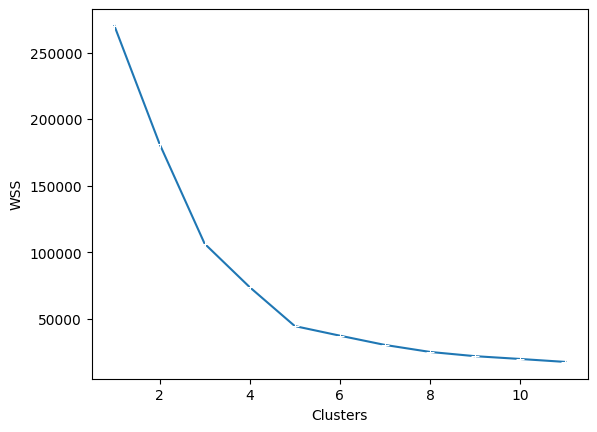

In [8]:
import seaborn as sns
sns.lineplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")


In [9]:
from kneefinder import KneeFinder

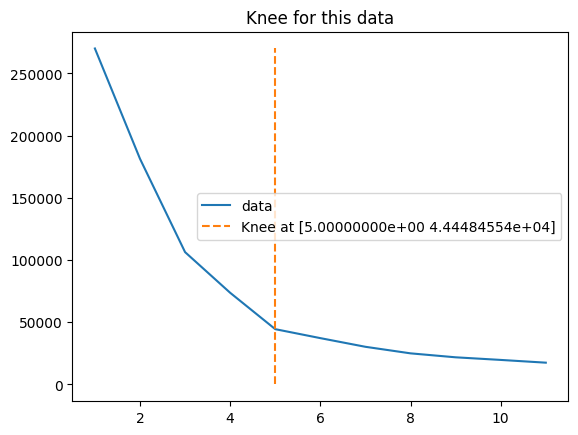

In [10]:

kf = KneeFinder(data_x = K,data_y= wss)
kf.plot()

# **Silhouette Method to Indentify Clusters**

In [11]:
import sklearn.metrics as metrics

In [12]:
SK = range(3,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
    score = metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.46761358158775423
Silhouette score for k(clusters) = 4 is 0.4931963109249047
Silhouette score for k(clusters) = 5 is 0.553931997444648
Silhouette score for k(clusters) = 6 is 0.5379675585622219
Silhouette score for k(clusters) = 7 is 0.5367379891273258
Silhouette score for k(clusters) = 8 is 0.4592958445675391
Silhouette score for k(clusters) = 9 is 0.45770857148861777
Silhouette score for k(clusters) = 10 is 0.446735677440187
Silhouette score for k(clusters) = 11 is 0.4472950813160941
Silhouette score for k(clusters) = 12 is 0.4257901147260263


In [13]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,3,0.467614
1,4,0.493196
2,5,0.553932
3,6,0.537968
4,7,0.536738
5,8,0.459296
6,9,0.457709
7,10,0.446736
8,11,0.447295
9,12,0.425790


<AxesSubplot: xlabel='Clusters', ylabel='Sil Score'>

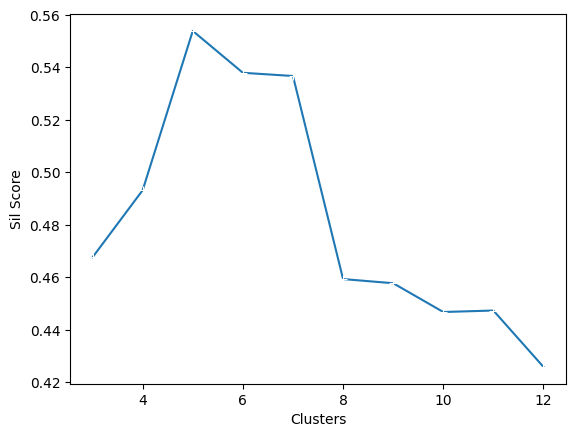

In [14]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

Max Silhouette Score as k = 5, Hence 5 Clusters is the right option

**Perform K-Mean Clustering with 5 **

In [15]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

Plot Clusters on Chart

In [16]:
df['Clusters'] = kmeans.labels_

<AxesSubplot: xlabel='Spending_Score', ylabel='Income'>

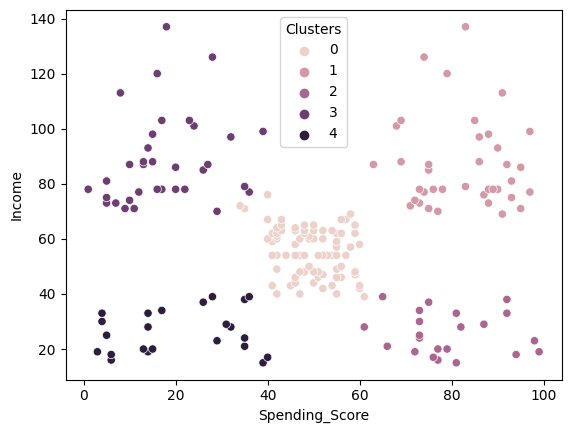

In [17]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)